<a href="https://colab.research.google.com/github/mariabandeira/EDO/blob/main/Pratica1_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 1

## 1) Método de Euler implícito para um PVI com uma EDO;

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def f(x, y):
  return x - 2*y + 1

In [ ]:
def euler(a, b, m, y0):
  h = (b - a)/m
  x = a
  y = y0
  VetX = [x]
  VetY = [y]
  Fxy = f(x,y)
  print("i \t x \t y \t Fxy")
  print(f"{0:.3f} \t {x:.3f} \t {y:.3f} \t {Fxy:.3f}")
  for i in range(1, m+1):
    x = a + i*h
    y = y + h*Fxy
    Fxy = f(x,y)
    print(f"{i:.3f} \t {x:.3f} \t {y:.3f} \t {Fxy:.3f}")
    VetX.append(x)
    VetY.append(y)
  return VetX, VetY

In [ ]:
VetX, VetY = euler(0, 1, 10, 1)

i 	 x 	 y 	 Fxy
0.000 	 0.000 	 1.000 	 -1.000
1.000 	 0.100 	 0.900 	 -0.700
2.000 	 0.200 	 0.830 	 -0.460
3.000 	 0.300 	 0.784 	 -0.268
4.000 	 0.400 	 0.757 	 -0.114
5.000 	 0.500 	 0.746 	 0.008
6.000 	 0.600 	 0.747 	 0.107
7.000 	 0.700 	 0.757 	 0.185
8.000 	 0.800 	 0.776 	 0.248
9.000 	 0.900 	 0.801 	 0.299
10.000 	 1.000 	 0.831 	 0.339


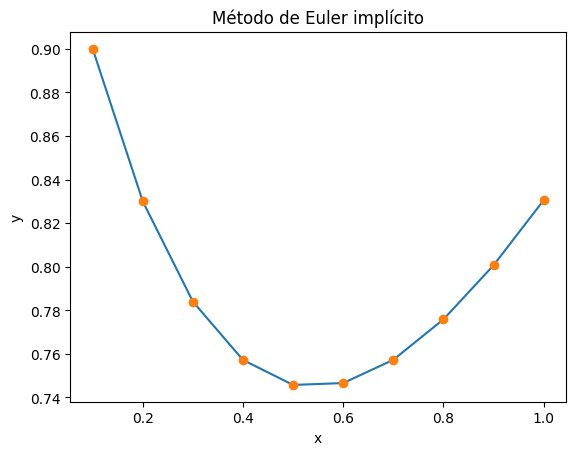

In [ ]:
plt.plot(VetX[1:], VetY[1:])
plt.plot(VetX[1:], VetY[1:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler implícito')
plt.show()

## 2) Método de Euler implícito para um PVI com um sistema de duas EDO’s;

In [ ]:
def f1(x, y1, y2):
  return 2*x*y1 + y2

def f2(x, y1, y2):
  return -y2 + y1*y2

In [ ]:
def euler2(a, b, m, y10, y20):
  h = (b - a)/m
  x = a
  y1 = y10
  y2 = y20

  VetX = [x]
  VetY1 = [y1]
  VetY2 = [y2]

  F1 = f1(x,y1, y2)
  F2 = f2(x,y1, y2)

  print("i \t x \t y1 \t y2 \t f1 \t f2")
  print(f"{0:.2f} \t {x:.2f} \t {y1:.2f} \t {y2:.2f} \t {F1:.2f} \t {F2:.2f}")

  for i in range(1, m+1):
    x = a + i*h
    y1 = y1 + h*F1
    y2 = y2 + h*F2
    F1 = f1(x,y1,y2)
    F2 = f2(x,y1,y2)
    print(f"{i:.2f} \t {x:.2f} \t {y1:.2f} \t {y2:.2f} \t {F1:.2f} \t {F2:.2f}")
    VetX.append(x)
    VetY1.append(y1)
    VetY2.append(y2)
  return VetX, VetY1, VetY2

In [ ]:
VetX, VetY1, VetY2 = euler2(1, 2, 4, 2, 1)

i 	 x 	 y1 	 y2 	 f1 	 f2
0.00 	 1.00 	 2.00 	 1.00 	 5.00 	 1.00
1.00 	 1.25 	 3.25 	 1.25 	 9.38 	 2.81
2.00 	 1.50 	 5.59 	 1.95 	 18.73 	 8.97
3.00 	 1.75 	 10.28 	 4.20 	 40.17 	 38.93
4.00 	 2.00 	 20.32 	 13.93 	 95.20 	 269.09


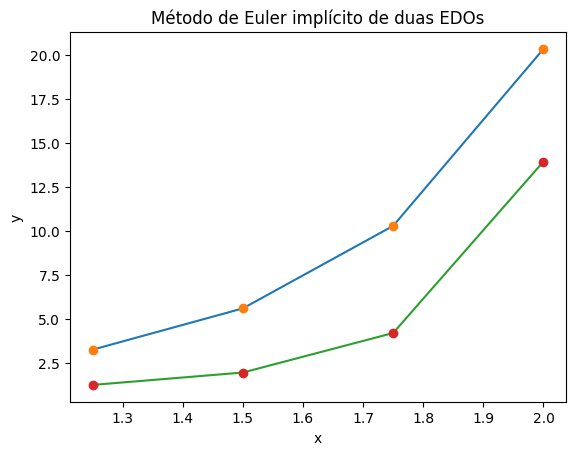

In [ ]:
plt.plot(VetX[1:], VetY1[1:])
plt.plot(VetX[1:], VetY1[1:], 'o')
plt.plot(VetX[1:], VetY2[1:])
plt.plot(VetX[1:], VetY2[1:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler implícito de duas EDOs')
plt.show()

## 3) Método de Runge-Kutta de quarta ordem para um PVI com uma EDO;

In [6]:
def runge_kutta(a, b, m, y0):
  h = (b - a)/m
  xt = a
  yt = y0
  VetX = [xt]
  VetY = [yt]
  fxy = f(xt, yt)
  print("i \t x \t y \t Fxy")
  print(f"{0:.3f} \t {xt:.3f} \t {yt:.3f} \t {fxy:.3f}")
  for i in range(1, m+1):
    x = xt
    y = yt
    k1 = f(x, y)
    x = xt + h/2
    y = yt + (h/2)*k1
    k2 = f(x, y)
    y = yt + (h/2)*k2
    k3 = f(x, y)
    x = xt + h
    y = yt + h*k3
    k4 = f(x, y)
    xt = a + i*h
    yt = yt + (h/6)*(k1 + 2*(k2 + k3) + k4)
    print(f"{i:.3f} \t {xt:.3f} \t {yt:.3f} \t {k1:.3f}")
    VetX.append(xt)
    VetY.append(yt)
  return VetX, VetY

In [3]:
def f(x, y):
  return x - 2*y + 1

In [7]:
VetX, VetY = runge_kutta(0, 1, 10, 1)

i 	 x 	 y 	 Fxy
0.000 	 0.000 	 1.000 	 -1.000
1.000 	 0.100 	 0.914 	 -1.000
2.000 	 0.200 	 0.853 	 -0.728
3.000 	 0.300 	 0.812 	 -0.505
4.000 	 0.400 	 0.787 	 -0.323
5.000 	 0.500 	 0.776 	 -0.174
6.000 	 0.600 	 0.776 	 -0.052
7.000 	 0.700 	 0.785 	 0.048
8.000 	 0.800 	 0.801 	 0.130
9.000 	 0.900 	 0.824 	 0.197
10.000 	 1.000 	 0.852 	 0.252


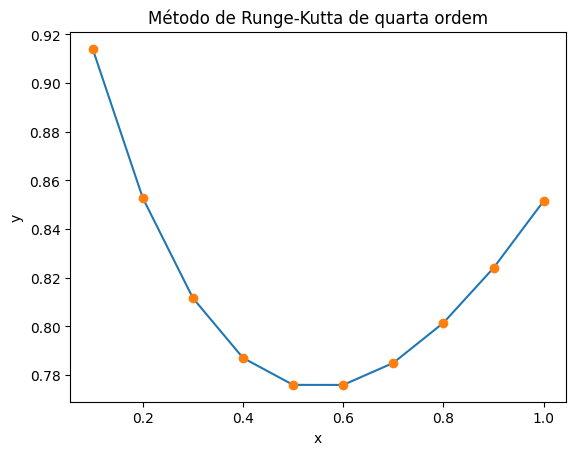

In [8]:
plt.plot(VetX[1:], VetY[1:])
plt.plot(VetX[1:], VetY[1:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Runge-Kutta de quarta ordem')
plt.show()

## 4) Método de Runge-Kutta de quarta ordem para um PVI com um sistema de duas EDO’s;

In [12]:
def runge_kutta2(a, b, m, y10, y20):
  h = (b - a)/m
  xt = a
  yt1 = y10
  yt2 = y20

  VetX = [xt]
  VetY1 = [yt1]
  VetY2 = [yt2]

  F1 = f1(xt, yt1, yt2)
  F2 = f2(xt, yt1, yt2)

  print("i \t x \t y1 \t y2 \t F1 \t F2")
  print(f"{0:.2f} \t {xt:.2f} \t {yt1:.2f} \t {yt2:.2f} \t {F1:.2f} \t {F2:.2f}")

  for i in range(1, m+1):
    x = xt
    y1 = yt1
    y2 = yt2
    k11 = f1(x, y1, y2)
    k12 = f2(x, y1, y2)
    x = xt + h/2
    y1 = yt1 + (h/2)*k11
    y2 = yt2 + (h/2)*k12
    k21 = f1(x, y1, y2)
    k22 = f2(x, y1, y2)
    y1 = yt1 + (h/2)*k21
    y2 = yt2 + (h/2)*k22
    k31 = f1(x, y1, y2)
    k32 = f2(x, y1, y2)
    x = xt + h
    y1 = yt1 + h*k31
    y2 = yt2 + h*k32
    k41 = f1(x, y1, y2)
    k42 = f2(x, y1, y2)
    xt = a + i*h
    yt1 = yt1 + (h/6)*(k11 + 2*(k21 + k31) + k41)
    yt2 = yt2 + (h/6)*(k12 + 2*(k22 + k32) + k42)
    print(f"{i:.2f} \t {xt:.2f} \t {yt1:.2f} \t {yt2:.2f} \t {k11:.2f} \t {k12:.2f}")
    VetX.append(xt)
    VetY1.append(yt1)
    VetY2.append(yt2)
  return VetX, VetY1, VetY2

In [10]:
def f1(x, y1, y2):
  return 2*x*y1 + y2

def f2(x, y1, y2):
  return -y2 + y1*y2

In [13]:
VetX, VetY1, VetY2 = runge_kutta2(1, 2, 4, 2, 1)

i 	 x 	 y1 	 y2 	 F1 	 F2
0.00 	 1.00 	 2.00 	 1.00 	 5.00 	 1.00
1.00 	 1.25 	 3.91 	 1.58 	 5.00 	 1.00
2.00 	 1.50 	 8.69 	 5.31 	 11.36 	 4.60
3.00 	 1.75 	 27.11 	 122.08 	 31.39 	 40.85
4.00 	 2.00 	 4965.30 	 4541745.51 	 216.97 	 3187.85


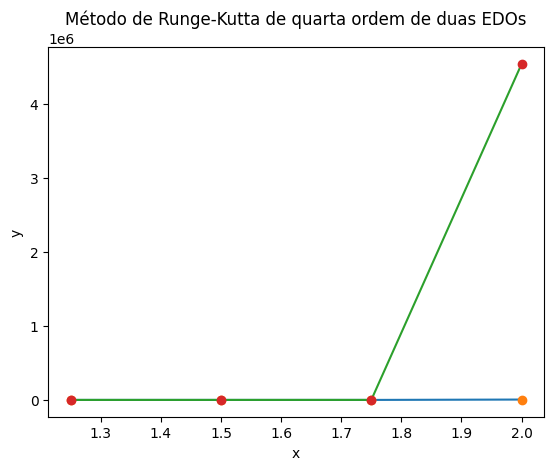

In [14]:
plt.plot(VetX[1:], VetY1[1:])
plt.plot(VetX[1:], VetY1[1:], 'o')
plt.plot(VetX[1:], VetY2[1:])
plt.plot(VetX[1:], VetY2[1:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Runge-Kutta de quarta ordem de duas EDOs')
plt.show()